<a href="https://colab.research.google.com/github/sivaroot/ProjectCPE-V.2/blob/master/Test/UnitTest_GaussianMixtureSegmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.mixture import GaussianMixture

In [0]:
input_img = cv2.imread("75yo_male.jpg",0)
rgb_img = cv2.imread("75yo_male.jpg")
blur_img = cv2.GaussianBlur(input_img,(5,5),0)
data = blur_img.ravel()
newdata  = np.expand_dims(data,1)

In [0]:
gmm = GaussianMixture(n_components = 4)
gmm = gmm.fit(newdata)




In [0]:
select_g = np.argmax(gmm.means_.ravel()) # find index of max value of mean (skull)
cluster = gmm.predict(newdata)
cluster[cluster != select_g] = (1 if select_g == 0 else 0)   # auto labeling 
cluster = cluster.reshape(512, 512)




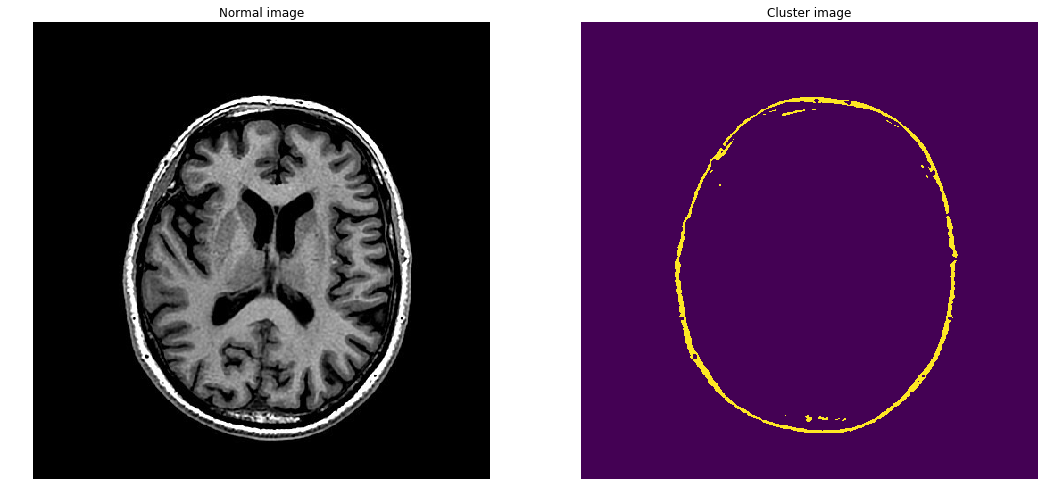

In [5]:
fig = plt.figure(figsize=(18,18))


col1 = fig.add_subplot(121)  # 1 row 2 col  --> position 1 
col2 = fig.add_subplot(122)  # 1 row 2 col  --> position 2

col1.imshow(rgb_img)
col1.set_title("Normal image")
col1.axis('off')

col2.imshow(cluster)
col2.set_title("Cluster image")
col2.axis('off')


fig.show()